In [1]:
import numpy as np
import pandas as pa
import pickle
from datetime import datetime
import librosa.display
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score, precision_score

from src.utils import get_framed_label, train_test_split, from_boolean_array_to_intervals
from src.data import load_annotation
from src.data import load_radar, load_water_distance, load_weight_sensor, load_audio
from src import make_dataset

import warnings
warnings.filterwarnings('ignore')


with open('../models/trained_models/urination-rf-sources-extended-embedding-0202.pkl', 'rb') as f:
    urinate_model = pickle.load(f)

with open('../models/trained_models/defecation-rf-sources-extended-embedding-0202.pkl', 'rb') as f:
    defecate_model = pickle.load(f)

In [2]:
config = {
    'USE_IDS': [],
    'DATAFRAME_PATH': "C:/Users/Jiajun/Desktop/download-project/data/raw/data_frames",
    'ANNOTATION_PATH': "C:/Users/Jiajun/Desktop/download-project/data/processed/Annotation.csv",
    'FEATURE_NAMES': ['Max', 'Min', 'Mean', 'Median', 'LogVariance', 'LinearTrend'],
    'SOURCE_NAMES': ['TotalWeight', 'RadarSum', 'AudioDelay4'],
    'WINDOW_SECONDS': 2,
    'HOP_SECONDS': 1,
    'CATEGORY': '',
}

annotations = load_annotation.get_annotation(config['ANNOTATION_PATH'])

In [3]:
# parameters
# eval_use_ids
# annotations
# urinate, defecate model

In [15]:
list(annotations.keys())

[1802,
 1806,
 1808,
 1818,
 1826,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1839,
 1841,
 1845,
 1854,
 1862,
 1863,
 1864,
 1870,
 1871,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1904,
 1906,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1937,
 1939,
 1940,
 1941,
 1943,
 1944,
 1945,
 1947,
 1949,
 1950,
 1951,
 1955,
 1992,
 1994,
 1995,
 1996,
 1997,
 1999,
 2000,
 2001,
 2002,
 2003,
 2009,
 2010,
 2013,
 2014,
 2015,
 2021,
 2022,
 2024,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2034,
 2035,
 2036,
 2037,
 2038,
 2041,
 2042,
 2043,
 2044,
 2048,
 2049,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2059,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068,
 2069,
 2070,
 2071,
 2072,
 2073,

In [19]:
urinate_train_config = {
    'USE_IDS': [],
    'DATAFRAME_PATH': "C:/Users/Jiajun/Desktop/download-project/data/raw/data_frames",
    'ANNOTATION_PATH': "C:/Users/Jiajun/Desktop/download-project/data/processed/Annotation.csv",
    'FEATURE_NAMES': ['Max', 'Min', 'Mean', 'Median', 'LogVariance', 'LinearTrend'],
    'SOURCE_NAMES': ['TotalWeight', 'RadarSum', 'AudioDelay4'],
    'WINDOW_SECONDS': 2,
    'HOP_SECONDS': 1,
    'CATEGORY': 'Urination'
}

defecate_train_config = {
    'USE_IDS': [],
    'DATAFRAME_PATH': "C:/Users/Jiajun/Desktop/download-project/data/raw/data_frames",
    'ANNOTATION_PATH': "C:/Users/Jiajun/Desktop/download-project/data/processed/Annotation.csv",
    'FEATURE_NAMES': ['Max', 'Min', 'Mean', 'Median', 'LogVariance', 'LinearTrend'],
    'SOURCE_NAMES': ['TotalWeight', 'RadarSum', 'AudioDelay4'],
    'WINDOW_SECONDS': 2,
    'HOP_SECONDS': 1,
    'CATEGORY': "Defecation"    
}

eval_config = {
    'USE_IDS': [1802,1806,1808,1818,1826,1828,1829,1830,1831,1832,1833,1834,1835,1836,1839,1841],
    'URINATE_MODEL': urinate_model,
    'DEFECATE_MODEL': defecate_model,
    'URINATE_TRAIN_CONFIG': urinate_train_config,
    'DEFECATE_TRAIN_CONFIG': defecate_train_config,
    'URINATE_THRESHOLD': 0.3,
    'DEFECATE_THRESHOLD': 0.3,
    'ANNOTATION_PATH': 'C:/Users/Jiajun/Desktop/download-project/data/processed/Annotation.csv'
}

In [ ]:
[1845, 1889, 1895, 1919, 1854, 1870, 1875, 1882, 1890, 1944]
[1945,1947,1949,1950,1951,1955,1992,1994,1995,1996,1997,1999]

updating 1802
updating 1802
updating 1806
updating 1806
updating 1808
updating 1808
updating 1818
updating 1818
updating 1826
updating 1826
updating 1828
updating 1828
updating 1829
updating 1829
updating 1830
updating 1830
updating 1831
updating 1831
updating 1832
updating 1832
updating 1833
updating 1833
updating 1834
updating 1834
updating 1835
updating 1835
updating 1836
updating 1836
updating 1839
updating 1839
updating 1841
updating 1841


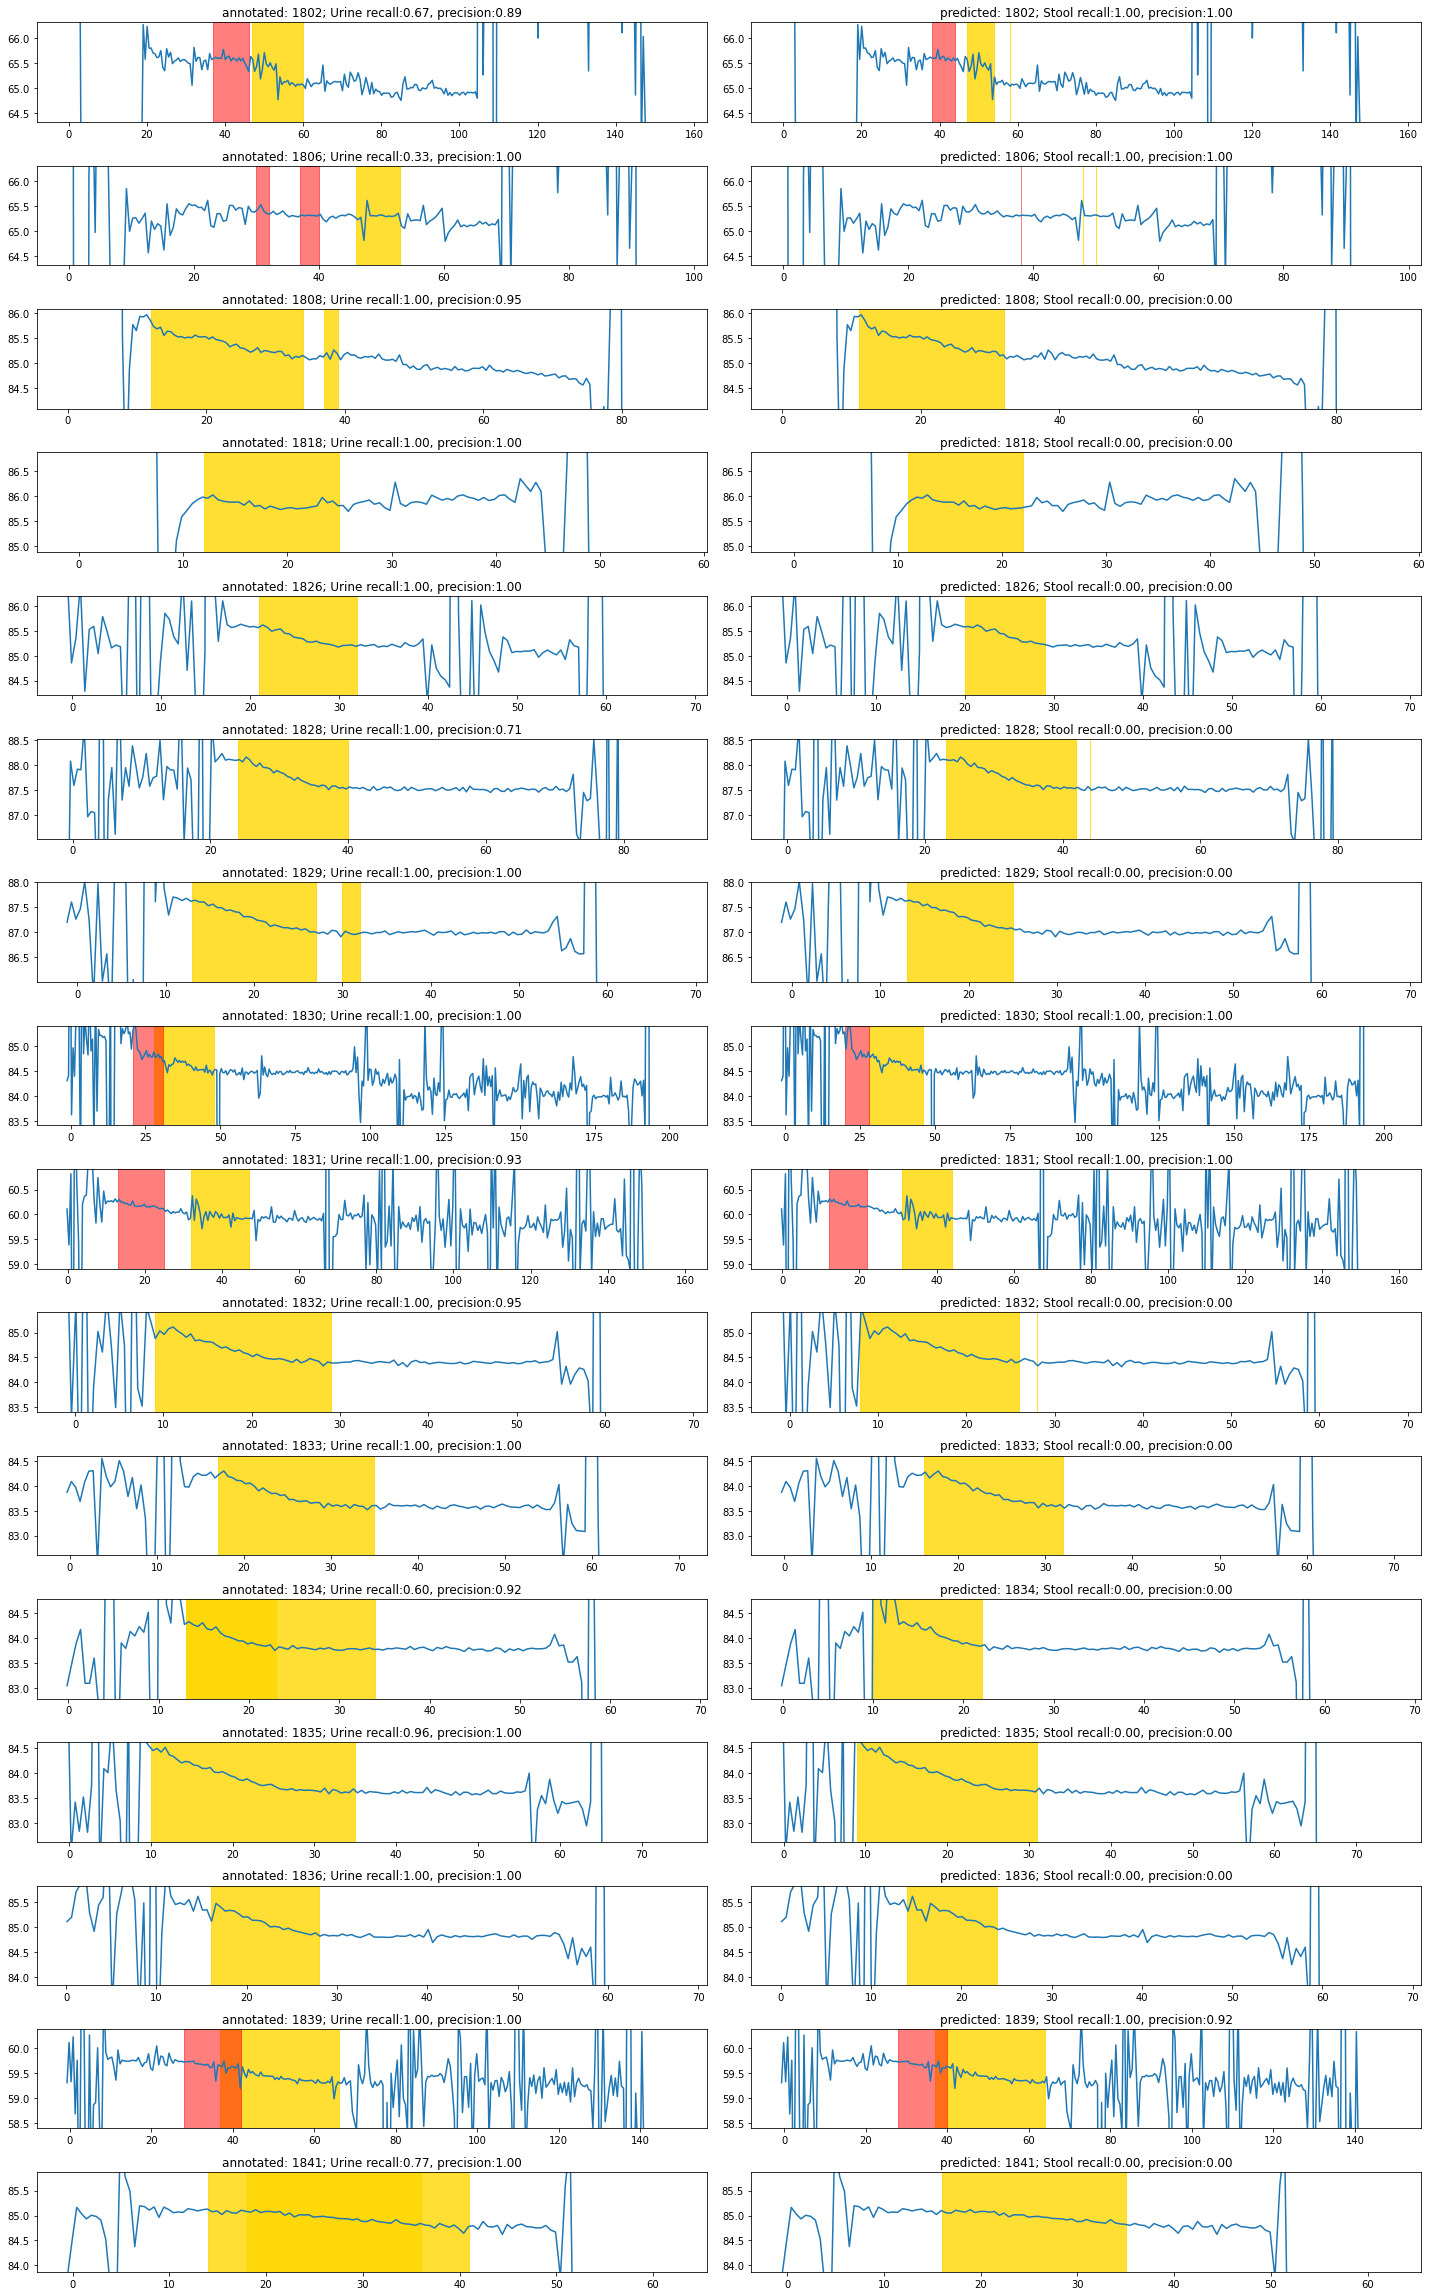

In [20]:
timestamp = datetime.now().strftime("%H-%M-%S")

eval_plot_matrix = EvalPlotMatrix(eval_config)
eval_plot_matrix.plots(f'eval-plot-matrices-{timestamp}.pdf')

In [11]:
class EvalPlotMatrix:
    def __init__(self, eval_config):
        self.eval_use_ids = eval_config['USE_IDS']
        self.urinate_model = eval_config['URINATE_MODEL']
        self.defecate_model = eval_config['DEFECATE_MODEL']
        self.urinate_train_config = eval_config['URINATE_TRAIN_CONFIG']
        self.defecate_train_config = eval_config['DEFECATE_TRAIN_CONFIG']
        self.urinate_threshold = eval_config['URINATE_THRESHOLD']
        self.defecate_threshold = eval_config['DEFECATE_THRESHOLD']
        self.annotations = load_annotation.get_annotation(eval_config['ANNOTATION_PATH'])
        
    def get_x_and_y(self, use_i, category):
        if category == "Urination":
            config = self.urinate_train_config.copy()
        elif category == "Defecation":
            config = self.defecate_train_config.copy()
        config['USE_IDS'] = [use_i]
        dataset_i = make_dataset.RandomForestExtended(config)
        x_i, y_i = dataset_i.get_features_and_labels_from_users()
        return x_i, y_i
    
    def get_predicted_region(self, use_i, category):
        if category == "Urination":
            model = self.urinate_model
            threshold = self.urinate_threshold
        elif category == "Defecation":
            model = self.defecate_model
            threshold = self.defecate_threshold
        self.x_i, self.y_i = self.get_x_and_y(use_i, category)
        self.boolean_array_i = (model.predict_proba(self.x_i)[:, 1] > threshold).astype(int)
        predicted_region = from_boolean_array_to_intervals(self.boolean_array_i)
        return predicted_region
    
    def get_annotated_region(self, use_i, category):
        annotated_region = []
        for region in self.annotations[use_i]:
            if region[-1] == category:
                annotated_region.append(region[:2])
        return annotated_region
    
    def get_eval_statistics(self):
        recall_ = recall_score(y_true=self.y_i, y_pred=self.boolean_array_i)
        precision_ = precision_score(y_true=self.y_i, y_pred=self.boolean_array_i)
        return recall_, precision_
        
    def make_subplot_1(self, ax, use_i, caption):
        total_weight_i = load_weight_sensor.get_total_weight_clean(use_i)
        ax.plot(total_weight_i)
        ax.set_ylim(total_weight_i.median()-1, total_weight_i.median()+1)
        ax.title.set_text(f'annotated: {use_i}; Urine recall:{caption[0]:.2f}, precision:{caption[1]:.2f}')
        for region in self.urinate_annotated_region:
            ax.axvspan(region[0], region[1], color="gold", alpha=0.8)
        for region in self.defecate_annotated_region:
            ax.axvspan(region[0], region[1], color="red", alpha=0.5)
        #ax.figtext(0.5, 0.01,
        #           f'Urine recall:{caption[0]}, precision:{caption[1]}',
        #           wrap=True, horizontalalignment='center', fontsize=12
        #)

    def make_subplot_2(self, ax, use_i, caption):
        total_weight_i = load_weight_sensor.get_total_weight_clean(use_i)
        ax.plot(total_weight_i)
        ax.title.set_text(f'predicted: {use_i}; Stool recall:{caption[0]:.2f}, precision:{caption[1]:.2f}')
        ax.set_ylim(total_weight_i.median()-1, total_weight_i.median()+1)
        for region in self.urinate_predicted_region:
            ax.axvspan(region[0], region[1], color="gold", alpha=0.8)
        for region in self.defecate_predicted_region:
            ax.axvspan(region[0], region[1], color="red", alpha=0.5)
        #ax.figtext(0.5, 0.01,
        #           f'Stool recall:{caption[0]}, precision:{caption[1]}',
        #           wrap=True, horizontalalignment='center', fontsize=12
        #)
            
    def plots(self, filename):
        nrow = len(self.eval_use_ids)
        ncol = 2
        fig, axes = plt.subplots(nrow, ncol, figsize=(10*ncol, 2*nrow))
        for idx, use_i in enumerate(self.eval_use_ids):
            self.urinate_annotated_region = self.get_annotated_region(use_i, "Urination")
            self.urinate_predicted_region = self.get_predicted_region(use_i, "Urination")
            self.urinate_recall, self.urinate_precision = self.get_eval_statistics()

            self.defecate_annotated_region = self.get_annotated_region(use_i, "Defecation")
            self.defecate_predicted_region = self.get_predicted_region(use_i, "Defecation")
            self.defecate_recall, self.defecate_precision = self.get_eval_statistics()

            # axes[idx][0]: total_weight with annotations
            self.make_subplot_1(axes[idx][0], use_i, [self.urinate_recall, self.urinate_precision])            
            # axes[idx][1]: total_weight with prediction
            self.make_subplot_2(axes[idx][1], use_i, [self.defecate_recall, self.defecate_precision])
            
        fig.tight_layout()
        plt.savefig(f'../reports/{filename}')